In [2]:
import os, glob
import pandas as pd
import datetime
import numpy as np
from epftoolbox.models_dorian._lear import LEAR

In [2]:
path_prices = "/Users/dorianfitton/Documents/Cours_Télécom/fil_rouge/data/day_ahead_price_data/"
path_demand = "/Users/dorianfitton/Documents/Cours_Télécom/fil_rouge/data/day_ahead_demand/"
path_generation = "/Users/dorianfitton/Documents/Cours_Télécom/fil_rouge/data/day_ahead_generation/"

#Day-ahead Prices
#Total Load - Day Ahead
#Generation Forecast - Day ahead

In [3]:
def csvs_to_df(path, file_name_start:str):
    all_files = glob.glob(os.path.join(path, file_name_start+"*.csv"))
    df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    df.columns = ['Time', *df.columns[1:]]
    df[df.columns[1]] = df[df.columns[1]].replace('-', '0').astype(float)
    return df


In [4]:
df_prices_h.loc[df_prices_h[df_prices_h.columns[1]].astype(str).str.contains('[^0-9\.]'), df_prices_h.columns[1]].unique()

NameError: name 'df_prices_h' is not defined

In [5]:
def delta_to_datetime(df, name_date_column:str):
    df[name_date_column]=df[name_date_column].apply(lambda x: x[19:35])
    df[name_date_column] = df[name_date_column].apply(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y %H:%M"))
    return df

In [6]:
def na_to_mean(df):
    df_p_na = df.loc[df[df.columns[1]].isna()==True].sort_values('Time')
    for i in df_p_na.index:
        df[df.columns[1]][i]=(df[df.columns[1]][i-1]+df[df.columns[1]][i+1])/2
    return df

In [7]:
df_prices_h = csvs_to_df(path_prices, "Day-ahead Prices")
df_demand_fif = csvs_to_df(path_demand, "Total Load - Day Ahead")
df_demand_h = df_demand_fif.iloc[3::4,:].reset_index().drop('index', axis=1)
df_generation_h = csvs_to_df(path_generation, "Generation Forecast - Day ahead")

df_prices_h= delta_to_datetime(df_prices_h, 'Time')
df_demand_h = delta_to_datetime(df_demand_h, 'Time')
df_generation_h = delta_to_datetime(df_generation_h, 'Time')

df_prices_h=na_to_mean(df_prices_h)
df_demand_h=na_to_mean(df_demand_h)
df_generation_h=na_to_mean(df_generation_h)



/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_51908/297795465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[1]][i]=(df[df.columns[1]][i-1]+df[df.columns[1]][i+1])/2


In [8]:
df_prices_h=df_prices_h.set_index('Time')
df_demand_h=df_demand_h.set_index('Time')
df_generation_h=df_generation_h.set_index('Time')

In [9]:
df_prices_h = df_prices_h['Day-ahead Price [EUR/MWh]']
df_demand_h = df_demand_h['Day-ahead Total Load Forecast [MW] - BZN|BE']
df_generation_h = df_generation_h['Scheduled Generation [MW] (D) - BZN|BE']


<AxesSubplot:xlabel='Time'>

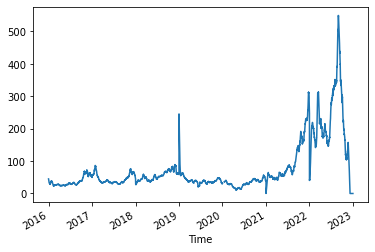

In [10]:
df_prices_h.rolling(365).mean().plot()

TypeError: unsupported operand type(s) for /: 'AxesSubplot' and 'float'

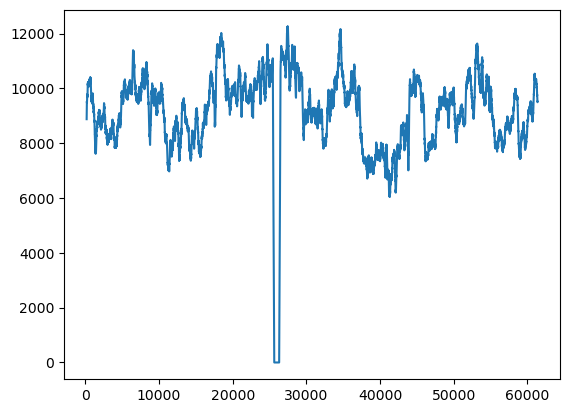

In [40]:
df_generation_h.rolling(180).mean().plot()/np.std(df_generation_h)
df_demand_h.rolling(180).mean().plot()

In [ ]:
df_prices_h.to_csv(path_prices+"/df_prices_h.csv")
df_demand_h.to_csv(path_demand+"/df_demand_h.csv")
df_generation_h.to_csv(path_generation+"/df_generation_h.csv")

In [11]:
mdl = LEAR()

NameError: name 'LEAR' is not defined

NameError: name 'LEAR' is not defined

In [8]:
test = df_demand_h.copy()
print(test.dtypes)
print(test.columns[1])
test

Time                                           datetime64[ns]
Day-ahead Total Load Forecast [MW] - BZN|BE           float64
Actual Total Load [MW] - BZN|BE                        object
dtype: object
Day-ahead Total Load Forecast [MW] - BZN|BE


,Time,Day-ahead Total Load Forecast [MW] - BZN|BE,Actual Total Load [MW] - BZN|BE
0,2017-01-01 01:00:00,9064.0,10001.0
1,2017-01-01 02:00:00,8823.0,9585.0
2,2017-01-01 03:00:00,8491.0,9186.0
3,2017-01-01 04:00:00,8182.0,8858.0
4,2017-01-01 05:00:00,8049.0,8591.0
...,...,...,...
61370,2020-12-31 20:00:00,10203.0,10110.0
61371,2020-12-31 21:00:00,9700.0,9655.0
61372,2020-12-31 22:00:00,9327.0,9271.0
61373,2020-12-31 23:00:00,9654.0,9626.0


In [208]:
df_demand_h

,index,Time,Day-ahead Total Load Forecast [MW] - BZN|BE,Actual Total Load [MW] - BZN|BE
0,3,2017-01-01 01:00:00,9064.0,10001.0
1,7,2017-01-01 02:00:00,8823.0,9585.0
2,11,2017-01-01 03:00:00,8491.0,9186.0
3,15,2017-01-01 04:00:00,8182.0,8858.0
4,19,2017-01-01 05:00:00,8049.0,8591.0
...,...,...,...,...
61370,245483,2020-12-31 20:00:00,10203.0,10110.0
61371,245487,2020-12-31 21:00:00,9700.0,9655.0
61372,245491,2020-12-31 22:00:00,9327.0,9271.0
61373,245495,2020-12-31 23:00:00,9654.0,9626.0


In [209]:
df_p_na = df_prices_h.loc[df_prices_h[df_prices_h.columns[1]].isna()==True].sort_values('Time')
df_p_na

,Time,Day-ahead Price [EUR/MWh],Currency,BZN|BE


In [189]:
for i in df_p_na.index:
    df_prices_h[df_prices_h.columns[1]][i]=(df_prices_h[df_prices_h.columns[1]][i-1]+df_prices_h[df_prices_h.columns[1]][i+1])/2

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_12307/3212621681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_copy[test_copy.columns[1]][i]=(test_copy[test_copy.columns[1]][i-1]+test_copy[test_copy.columns[1]][i+1])/2


In [192]:
test_copy.isna().value_counts()

Time   Day-ahead Price [EUR/MWh]  Currency  BZN|BE
False  False                      False     True      60409
                                  True      True        966
dtype: int64

In [212]:
df_demand_h.loc[df_demand_h[df_demand_h.columns[1]].isna()==True].sort_values('Time')

,Time,Day-ahead Total Load Forecast [MW] - BZN|BE,Actual Total Load [MW] - BZN|BE


In [123]:
df_generation_h.loc[df_generation_h[df_generation_h.columns[1]].isna()==True].sort_values('Time')

,Time,Scheduled Generation [MW] (D) - BZN|BE,Scheduled Consumption [MW] (D) - BZN|BE
54656,2016-03-27 03:00:00,NaN,NaN
45847,2017-03-26 03:00:00,NaN,NaN
37062,2018-03-25 03:00:00,NaN,NaN
2138,2019-03-31 03:00:00,NaN,NaN
10875,2020-03-29 03:00:00,NaN,NaN
28373,2021-03-28 03:00:00,NaN,NaN
19588,2022-03-27 03:00:00,NaN,NaN


In [53]:
string = "01.01.2020 00:00 - 01.01.2020 01:00"

In [1]:
string[19:]

NameError: name 'string' is not defined

In [32]:
df_demand_h.dtypes

Time                                           datetime64[ns]
Day-ahead Total Load Forecast [MW] - BZN|BE           float64
Actual Total Load [MW] - BZN|BE                        object
dtype: object